# Demo magnify

Illustrate the interpolation of magnified images

## Description

In this demonstration, the interpolation of magnified image is explained using the frequency domain. The interpolation is a low pass filter that can be applied either in the spatial domain, which is the methods known as nearest neighbor or pixel replication and bi-linear interpolation. Or in the frequency domain, with an ideal filter or a butterworth filter.

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import sys,os
ia898path = os.path.abspath('../../')
if ia898path not in sys.path:
    sys.path.append(ia898path)
import ia898.src as ia

## Reading and ROI selection

The image is read and a 64x64 ROI is selected and displayed

""
"(256, 256)"
""
"(64, 64)"

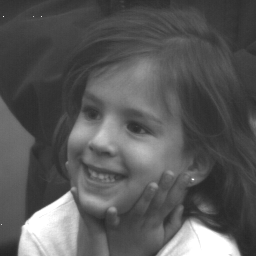
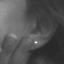

(64, 64)


In [2]:
fin = mpimg.imread('../data/lenina.pgm')
nb = ia.nbshow(3)
nb.nbshow(fin,'%s'% (fin.shape,))
froi = fin[137:137+64,157:157+64]
nb.nbshow(froi,'%s'% (froi.shape,))
nb.nbshow()
print(froi.shape)

## DFT
---

The DFT of the small image is taken and its spectrum displayed

.. code:: python

    import numpy as np
    from ia636 import iadftview
    
    fd = froi.astype(float)
    F = np.fft.fft2(fd)
    adshow(froi)
    adshow(iadftview(F))


Expansion by 4 without interpolation
------------------------------------

The image is expanded by 4, but filling the new pixels with 0

.. code:: python

    fx4 = zeros(4*array(froi.shape))
    fx4[::4,::4] = froi
    adshow(froi)
    adshow(fx4)


DFT of the expansion without interpolation
------------------------------------------

Using the expansion propertie of the DFT (only valid for the discrete case), the resulting DFT is a periodical replication of the original DFT.

.. code:: python

    fdx4 = fx4.astype(float)
    Fx4 = np.fft.fft2(fdx4)
    adshow(fx4)
    adshow(iadftview(Fx4))


Filtering by mean filtering - nearest neighbor
----------------------------------------------

Filtering the expanded image using an average filter of size 4x4 is equivalent of applying a nearest neighbor interpolator. The zero pixels are replaced by the nearest non-zero pixel. This is equivalent to interpolation by pixel replication.

.. code:: python

    from ia636 import iapconv

    k = ones((4,4))
    fx4nn = iapconv(fdx4, k)
    adshow(fx4)
    adshow(fx4nn.astype(int32))

Interpretation of the mean filtering in the frequency domain
------------------------------------------------------------

Filtering by the average filter in space domain is equivalent to filter in the frequency domain by the sync filter.

.. code:: python

    kzero = zeros(fx4.shape)
    kzero[0:4,0:4] = k
    K = np.fft.fft2(kzero)
    adshow(iadftview(K))
    Fx4nn = K * Fx4
    adshow(iadftview(Fx4nn))


Filtering by pyramidal kernel, linear interpolation
---------------------------------------------------

Filtering by a pyramidal kernel in space domain is equivalent to make a bi-linear interpolation. The zero pixels are replaced by a weighted sum of the neighbor pixels, the weight is inversely proportional to the non-zero pixel distance.

.. code:: python

    klinear = array([1,2,3,4,3,2,1])/4.
    k2dlinear = dot(reshape(klinear, (7,1)), reshape(klinear, (1,7)))
    print 'k2dlinear=',k2dlinear
    fx4li = iapconv(fdx4, k2dlinear)
    adshow(fx4)
    adshow(fx4li.astype(int32))

Interpretation of the pyramid filtering in the frequency domain
---------------------------------------------------------------

Filtering by the pyramid filter in space domain is equivalent to filter in the frequency domain by the square of the sync filter.

.. code:: python

    klizero = zeros(fx4.shape).astype(float)
    klizero[0:7,0:7] = k2dlinear
    Klinear = np.fft.fft2(klizero)
    adshow(iadftview(Klinear))
    Fx4li = Klinear * Fx4
    adshow(iadftview(Fx4li))


Using an ideal filter
---------------------

Filtering by cutoff period of 8

.. code:: python

    from ia636 import iabwlp
    from ia636 import ianormalize

    H8 = iabwlp(fx4.shape, 8, 10000)
    adshow(iadftview(H8))
    G8 = Fx4 * H8
    adshow(iadftview(G8))
    g_ideal = np.fft.ifft2(G8)
    print 'Max of imaginary:', g_ideal.imag.max()
    g_ideal = ianormalize(g_ideal.real, [0,255])
    adshow(g_ideal)

Using a Butterworth filter of order 5
-------------------------------------

Filtering by cutoff period of 8

.. code:: python

    HB8 = iabwlp(fx4.shape, 8, 5)
    adshow(iadftview(HB8))
    GB = Fx4 * HB8
    adshow(iadftview(GB))
    g_b = np.fft.ifft2(GB)
    print 'Max of imaginary:', g_b.imag.max()
    g_b = ianormalize(g_b.real, [0,255])
    adshow(g_b)


Display all four for comparison
-------------------------------

Top-left: nearest neighbor, Top-right: linear, Bottom-left: ideal, Bottom-right: Butterworth

.. code:: python

    aux1 = np.concatenate((fx4nn[0:256,0:256], fx4li[0:256,0:256]), 1)
    aux2 = np.concatenate((g_ideal, g_b), 1)
    adshow(np.concatenate((aux1, aux2)))